<a href="https://colab.research.google.com/github/somezzedup/Micro-Credential-Winter-2022/blob/main/NYC_311_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/311_Service_Requests_from_2019May.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,42680103,5/1/2019 0:00,5/16/2019 21:45,DEP,Water System,NaN,11420,127-16 111 AVENUE,111 AVENUE,ADDRESS,South Ozone Park,NaN,NaN,Closed,NaN,The Department of Environment Protection inspe...,4.116320e+09,QUEENS,40.682565,-73.814060,"(40.682565064146196, -73.81406015056832)"
1,42530481,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10011,207 WEST 14 STREET,WEST 14 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 22:17,Callers should contact the DOHMH Foodborne Ill...,1.007640e+09,MANHATTAN,40.738791,-74.000224,"(40.738790792032844, -74.00022373020307)"
2,42527619,5/1/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10025,2664 BROADWAY,BROADWAY,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:04,The Department of Health and Mental Hygiene wi...,1.018730e+09,MANHATTAN,40.798040,-73.969300,"(40.79804015465285, -73.96930001020544)"
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
4,42526595,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11106,31-91 21 STREET,21 STREET,ADDRESS,Astoria,NaN,NaN,Closed,5/15/2019 17:12,The Department of Health and Mental Hygiene wi...,4.005540e+09,QUEENS,40.765367,-73.931540,"(40.76536704921336, -73.93154011254339)"


In [ ]:
df[['Borough','Agency']].sort_values(by='Borough')
df[['Borough','Agency']].sort_values(by='Borough').nunique()

Borough     6
Agency     20
dtype: int64

In [ ]:
df.shape

(69637, 21)

In [ ]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Description', 'BBL', 'Borough', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
df.groupby(['Borough'])['Unique Key'].count()

Borough
BRONX            10925
BROOKLYN         22247
MANHATTAN        13133
QUEENS           18623
STATEN ISLAND     3848
Unspecified        861
Name: Unique Key, dtype: int64

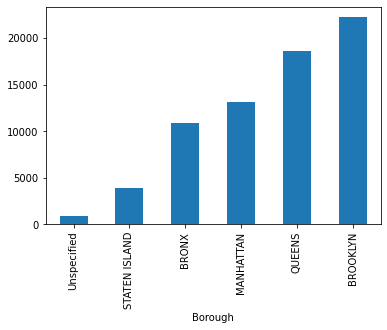

In [ ]:
df.groupby(['Borough'])['Unique Key'].count().sort_values(ascending=True).plot(kind='bar')

In [10]:
df.groupby(['Borough'])['Unique Key'].count()

Borough
BRONX            10925
BROOKLYN         22247
MANHATTAN        13133
QUEENS           18623
STATEN ISLAND     3848
Unspecified        861
Name: Unique Key, dtype: int64

In [11]:
borough_df = df.groupby(['Borough'])['Unique Key'].count()

In [12]:
borough_df

Borough
BRONX            10925
BROOKLYN         22247
MANHATTAN        13133
QUEENS           18623
STATEN ISLAND     3848
Unspecified        861
Name: Unique Key, dtype: int64

In [13]:
type(borough_df)

pandas.core.series.Series

In [14]:
borough_df.index

Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND',
       'Unspecified'],
      dtype='object', name='Borough')

In [16]:
#labeling x and y axis
plt.ylabel = 'Frequency'
plt.xlabel = 'Borough'

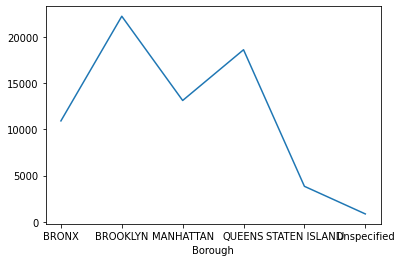

In [17]:
borough_df.plot()

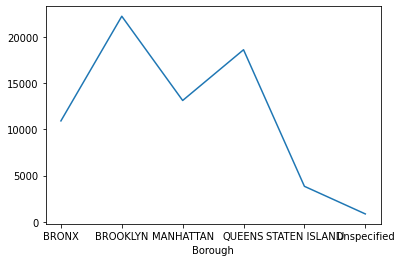

In [18]:
borough_df.plot(kind = 'line')

In [20]:
df['City']

0        South Ozone Park
1                NEW YORK
2                NEW YORK
3                BROOKLYN
4                 Astoria
               ...       
69632               BRONX
69633       STATEN ISLAND
69634               BRONX
69635            BROOKLYN
69636            BROOKLYN
Name: City, Length: 69637, dtype: object

In [22]:
df[['Borough','Agency']]

,Borough,Agency
0,QUEENS,DEP
1,MANHATTAN,DOHMH
2,MANHATTAN,DOHMH
3,BROOKLYN,DOHMH
4,QUEENS,DOHMH
...,...,...
69632,BRONX,DOHMH
69633,STATEN ISLAND,DOHMH
69634,BRONX,DOHMH
69635,BROOKLYN,DOHMH


In [23]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,BBL,Borough,Latitude,Longitude,Location
0,42680103,5/1/2019 0:00,5/16/2019 21:45,DEP,Water System,NaN,11420,127-16 111 AVENUE,111 AVENUE,ADDRESS,South Ozone Park,NaN,NaN,Closed,NaN,The Department of Environment Protection inspe...,4.116320e+09,QUEENS,40.682565,-73.814060,"(40.682565064146196, -73.81406015056832)"
1,42530481,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10011,207 WEST 14 STREET,WEST 14 STREET,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 22:17,Callers should contact the DOHMH Foodborne Ill...,1.007640e+09,MANHATTAN,40.738791,-74.000224,"(40.738790792032844, -74.00022373020307)"
2,42527619,5/1/2019 0:00,5/13/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,10025,2664 BROADWAY,BROADWAY,ADDRESS,NEW YORK,NaN,NaN,Closed,5/15/2019 10:04,The Department of Health and Mental Hygiene wi...,1.018730e+09,MANHATTAN,40.798040,-73.969300,"(40.79804015465285, -73.96930001020544)"
3,42526597,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11208,624 SOUTH CONDUIT BOULEVARD,SOUTH CONDUIT BOULEVARD,ADDRESS,BROOKLYN,NaN,NaN,Closed,5/15/2019 17:27,The Department of Health and Mental Hygiene wi...,3.042380e+09,BROOKLYN,40.675905,-73.866660,"(40.67590510222738, -73.86665990579837)"
4,42526595,5/1/2019 0:00,5/2/2019 0:00,DOHMH,Food Poisoning,Restaurant/Bar/Deli/Bakery,11106,31-91 21 STREET,21 STREET,ADDRESS,Astoria,NaN,NaN,Closed,5/15/2019 17:12,The Department of Health and Mental Hygiene wi...,4.005540e+09,QUEENS,40.765367,-73.931540,"(40.76536704921336, -73.93154011254339)"


In [24]:
borough_Agency_df = df[['Borough', 'Agency', 'Complaint Type']]

In [25]:
borough_Agency_df.shape

(69637, 3)

In [26]:
borough_Agency_df.head()

,Borough,Agency,Complaint Type
0,QUEENS,DEP,Water System
1,MANHATTAN,DOHMH,Food Poisoning
2,MANHATTAN,DOHMH,Food Poisoning
3,BROOKLYN,DOHMH,Food Poisoning
4,QUEENS,DOHMH,Food Poisoning


In [27]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Location Type', 'Incident Zip', 'Incident Address', 'Street Name',
       'Address Type', 'City', 'Landmark', 'Facility Type', 'Status',
       'Due Date', 'Resolution Description', 'BBL', 'Borough', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [28]:
column_names = ['Borough', 'Agency', 'Complaint Type', 'Facility Type', 'City', 'Resolution Description']

In [29]:
new_df = df[column_names]

In [31]:
new_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
0,QUEENS,DEP,Water System,NaN,South Ozone Park,The Department of Environment Protection inspe...
1,MANHATTAN,DOHMH,Food Poisoning,NaN,NEW YORK,Callers should contact the DOHMH Foodborne Ill...
2,MANHATTAN,DOHMH,Food Poisoning,NaN,NEW YORK,The Department of Health and Mental Hygiene wi...
3,BROOKLYN,DOHMH,Food Poisoning,NaN,BROOKLYN,The Department of Health and Mental Hygiene wi...
4,QUEENS,DOHMH,Food Poisoning,NaN,Astoria,The Department of Health and Mental Hygiene wi...


In [33]:
#subset of table for agency with DEP only
new_DEP_Agency_df = new_df[new_df['Agency']=='DEP']

In [34]:
new_DEP_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
0,QUEENS,DEP,Water System,NaN,South Ozone Park,The Department of Environment Protection inspe...
10,BROOKLYN,DEP,FATF,NaN,BROOKLYN,The Department of Environmental Protection has...
11,BROOKLYN,DEP,Noise,NaN,BROOKLYN,The Department of Environmental Protection did...
24,BRONX,DEP,Noise,NaN,BRONX,The Department of Environmental Protection did...
27,STATEN ISLAND,DEP,Water System,NaN,STATEN ISLAND,The Department of Environmental Protection inv...


In [35]:
df.groupby('Agency')['Unique Key'].count().sort_values(ascending =True)

Agency
TAX          6
ACS          8
DOITT       12
DCAS        26
DOE         44
EDC         61
DFTA       226
HRA        238
DCA        385
DHS        476
TLC        761
DOF       1259
DOHMH     1868
DPR       3065
DOB       4150
DEP       5179
DOT       8208
HPD      11215
DSNY     11262
NYPD     21188
Name: Unique Key, dtype: int64

In [49]:
#subset of table for agency with TAX only
new_TAX_Agency_df = new_df[new_df['Agency']=='TAX']
new_TAX_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
821,Unspecified,TAX,Comments,NaN,NaN,Your comments have been submitted to the Tax C...
2765,Unspecified,TAX,Question,NaN,NaN,Your comments have been submitted to the Tax C...
11819,Unspecified,TAX,Question,NaN,NaN,Your comments have been submitted to the Tax C...
30496,Unspecified,TAX,Question,NaN,NaN,Your comments have been submitted to the Tax C...
30583,Unspecified,TAX,Question,NaN,NaN,Your comments have been submitted to the Tax C...


In [48]:
#subset of table for agency with DOE only
new_DOE_Agency_df = new_df[new_df['Agency']=='DOE']
new_DOE_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
32,QUEENS,DOE,School Maintenance,School,JACKSON HEIGHTS,The Department of Education completed the work...
492,BRONX,DOE,School Maintenance,School,BRONX,The Department of Education completed the work...
818,QUEENS,DOE,School Maintenance,School,ASTORIA,The Department of Education completed the work...
6006,BRONX,DOE,School Maintenance,School,BRONX,The Department of Education completed the work...
13121,BROOKLYN,DOE,School Maintenance,School,BROOKLYN,The Department of Education completed the work...


In [47]:
#subset of table for agency with DSNY only
new_DSNY_Agency_df = new_df[new_df['Agency']=='DSNY']
new_DSNY_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
17,MANHATTAN,DSNY,Sanitation Condition,DSNY Garage,NEW YORK,The Department of Sanitation investigated this...
20,BROOKLYN,DSNY,Request Large Bulky Item Collection,NaN,BROOKLYN,NaN
21,MANHATTAN,DSNY,Sanitation Condition,DSNY Garage,NEW YORK,The Department of Sanitation investigated this...
72,BROOKLYN,DSNY,Electronics Waste,NaN,BROOKLYN,The Department of Sanitation did not find any ...
78,MANHATTAN,DSNY,Request Large Bulky Item Collection,NaN,NEW YORK,NaN


In [53]:
#subset of table for agency with NYPD only
new_DSNY_Agency_df = new_df[new_df['Agency']=='NYPD']
new_DSNY_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
12,MANHATTAN,NYPD,Noise - Residential,Precinct,NEW YORK,Your request can not be processed at this time...
15,MANHATTAN,NYPD,Noise - Residential,Precinct,NEW YORK,The Police Department responded to the complai...
16,BROOKLYN,NYPD,Noise - Residential,Precinct,BROOKLYN,The Police Department responded to the complai...
18,BRONX,NYPD,Blocked Driveway,Precinct,BRONX,The Police Department issued a summons in resp...
23,BROOKLYN,NYPD,Noise - Residential,Precinct,BROOKLYN,The Police Department responded to the complai...


In [55]:
#subset of table for agency with NYPD only
new_TLC_Agency_df = new_df[new_df['Agency']=='TLC']
new_TLC_Agency_df.head()

,Borough,Agency,Complaint Type,Facility Type,City,Resolution Description
124,MANHATTAN,TLC,Taxi Report,NaN,NEW YORK,Your report has been sent to the Taxi and Limo...
281,BROOKLYN,TLC,Taxi Complaint,NaN,BROOKLYN,The Taxi and Limousine Commission (TLC) has re...
355,BROOKLYN,TLC,Taxi Complaint,NaN,BROOKLYN,The Taxi and Limousine Commission (TLC) has re...
406,STATEN ISLAND,TLC,For Hire Vehicle Complaint,NaN,STATEN ISLAND,The Taxi and Limousine Commission (TLC) has re...
497,MANHATTAN,TLC,For Hire Vehicle Complaint,NaN,NEW YORK,The Taxi and Limousine Commission was unable t...
